<a href="https://colab.research.google.com/github/nickrolen/data-wrangling/blob/main/Module_3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We'll start by importing the dataset as a CSV file. The original dataset had spaces in the category names, so I edited them to underscores beforehand so I can work with them in Python.

In [ ]:
crimestats = pd.read_csv('phxcrimedata1.csv')

In [21]:
crimestats

,_id,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100 BLOCK ADDR,ZIP,PREMISE_TYPE,GRID
0,1,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,BJ04
1,2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,BI30
2,3,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,BJ30
3,4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,DA19
4,5,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT,BJ21
...,...,...,...,...,...,...,...,...,...
528422,528423,202400000254051,02/19/2024 23:00,02/20/2024 09:00,LARCENY-THEFT,14XX E BELL RD,85022.0,PARKING LOT,DH30
528423,528424,202400000268004,02/19/2024 23:00,NaN,RAPE,96XX N METRO PKWY W,85051.0,GOVERNMENT / PUBLIC BUILDING,CH22
528424,528425,202400000252611,02/19/2024 23:14,NaN,AGGRAVATED ASSAULT,10XX N 24TH ST,85006.0,PARKING LOT,BC32B
528425,528426,202400000258737,02/19/2024 23:30,02/21/2024 00:00,MOTOR VEHICLE THEFT,40XX W BUCKSKIN TRL,85083.0,DRIVEWAY,EH19


Now, we'll get some basic descriptive information on the dataset.

In [22]:
crimestats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528427 entries, 0 to 528426
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _id                 528427 non-null  int64  
 1   INC_NUMBER          528427 non-null  object 
 2   OCCURRED_ON         528008 non-null  object 
 3   OCCURRED_TO         340233 non-null  object 
 4   UCR_CRIME_CATEGORY  528427 non-null  object 
 5   100 BLOCK ADDR      528427 non-null  object 
 6   ZIP                 528421 non-null  float64
 7   PREMISE_TYPE        524907 non-null  object 
 8   GRID                526988 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 36.3+ MB


In [23]:
crimestats.nunique()

_id                   528427
INC_NUMBER            528422
OCCURRED_ON           335820
OCCURRED_TO           248011
UCR_CRIME_CATEGORY         9
100 BLOCK ADDR         48187
ZIP                      117
PREMISE_TYPE              98
GRID                    1783
dtype: int64

Here, I am choosing to group crimes by category of crime to first see which types of crimes are most commony popping up in this dataset.

In [24]:
crimestats.UCR_CRIME_CATEGORY.value_counts()

LARCENY-THEFT                            268897
BURGLARY                                  67736
MOTOR VEHICLE THEFT                       60535
DRUG OFFENSE                              48112
AGGRAVATED ASSAULT                        47967
ROBBERY                                   20786
RAPE                                       8148
ARSON                                      4886
MURDER AND NON-NEGLIGENT MANSLAUGHTER      1360
Name: UCR_CRIME_CATEGORY, dtype: int64

<Axes: >

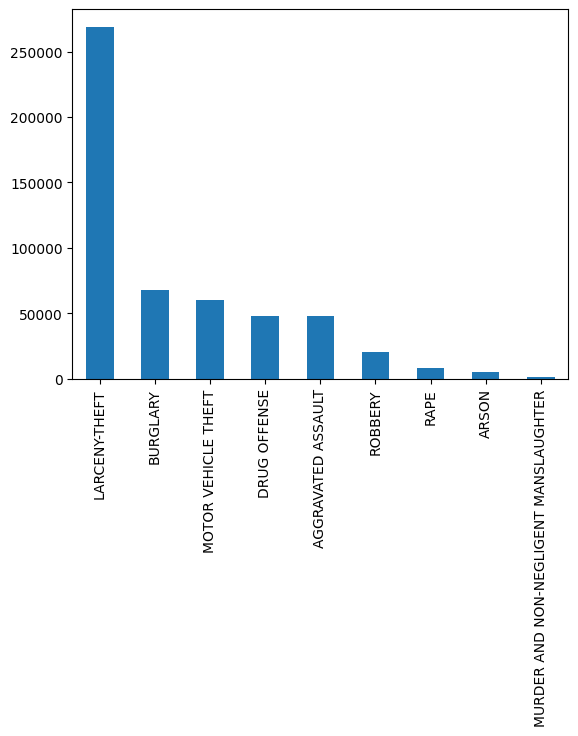

In [26]:
crimestats.UCR_CRIME_CATEGORY.value_counts().plot.bar()

As we can see from this bar chart, larceny/theft is by far and away the most commonly seen category of crime in this dataset.

Now, I will use the groupby function to group the data by crime category, so I can get the value counts for crime category across the premise type variable so I can see which types of premises yield the most crimes for each category of crime.

In [ ]:
cscrimetype = crimestats.groupby(['UCR_CRIME_CATEGORY'])
type(cscrimetype)

In [37]:
cscrimetype.PREMISE_TYPE.value_counts()

UCR_CRIME_CATEGORY  PREMISE_TYPE                       
AGGRAVATED ASSAULT  APARTMENT                              12030
                    SINGLE FAMILY HOUSE                     9215
                    STREET / ROADWAY / SIDEWALK             5945
                    STREET / ROADWAY / ALLEY / SIDEWALK     5157
                    CONVENIENCE MARKET / STORE              1512
                                                           ...  
ROBBERY             RAIL STATION                               1
                    RAIL STOP                                  1
                    REST AREA                                  1
                    STOREROOM/SHED (COMMERCIAL)                1
                    THEATRE                                    1
Name: PREMISE_TYPE, Length: 707, dtype: int64

This list tells us which types of premises are seeing the most types of specific crimes. As we can see, there were more aggravated assaults in apartments than any other type of premises.

Next, I will get the value counts for crime category across ZIP codes to see which ZIP codes yield the most crimes for each category of crime. I will change the ZIP variable type from a string to a float as these are two categorical variables I am dealing with.

In [48]:
str(crimestats.ZIP)
cscrimetype.ZIP.value_counts()

UCR_CRIME_CATEGORY  ZIP    
AGGRAVATED ASSAULT  85015.0    2484
                    85017.0    2466
                    85008.0    2455
                    85009.0    2445
                    85051.0    2182
                               ... 
ROBBERY             85303.0       1
                    85337.0       1
                    85338.0       1
                    85345.0       1
                    85383.0       1
Name: ZIP, Length: 690, dtype: int64

As we can see, there were more aggravated assaults in 85015 than any other zip code.